In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

1.1.1 Пример

In [3]:
class Perceptron:
  def __init__(self, N):
    self.w = list()
    for i in range(N):
      self.w.append(0)

  def calc(self, x):
    res = 0
    for i in range(len(self.w)):
      res = res + self.w[i] * x[i]
    return res
  
  def sign(self, x):
    if self.calc(x) > 0:
      return 1
    else:
      return -1
  
  def learn(self, la, x, y):
    if y * self.calc(x) <= 0:
      for i in range(len(self.w)):
        self.w[i] = self.w[i] + la * y * x[i]
  
  def learning(self, la, T):
    for n in range(100):
      for t in T:
        self.learn(la, t[0], t[1])

In [4]:
perceptron = Perceptron(2)
la = 0.1

T = list()
T.append([[2, 1], 1])
T.append([[3, 2], 1])
T.append([[4, 1], 1])
T.append([[1, 2], -1])
T.append([[2, 3], -1])
T.append([[5, 7], -1])
perceptron.learning(la, T)
print(perceptron.w)
print(perceptron.sign([1.5, 2]))
print(perceptron.sign([3, 1.5]))
print(perceptron.sign([5, 1]))
print(perceptron.sign([5, 10]))

[0.1, -0.1]
-1
1
1
-1


1.1.2 Пример

In [5]:
import numpy as np

def sigmoid(x):
  return 1 / (1 + np.exp(-x))


class Neuron:
  def __init__(self, weights, bias):
    self.weights = weights
    self.bias = bias
  def feedforward(self, inputs):
    total = np.dot(self.weights, inputs) + self.bias
    return sigmoid(total)

weights = np.array([0, 1])
bias = 4
n = Neuron(weights, bias)
x = np.array([2, 3])
print(n.feedforward(x))

0.9990889488055994


In [7]:
class OurNeuralNetwork:
  def __init__(self):
    weights = np.array([0, 1])
    bias = 0
    self.h1 = Neuron(weights, bias)
    self.h2 = Neuron(weights, bias)
    self.o1 = Neuron(weights, bias)
  def feedforward(self, x):
    out_h1 = self.h1.feedforward(x)
    out_h2 = self.h2.feedforward(x)
    out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
    return out_o1


network = OurNeuralNetwork()
x = np.array([2, 3])
print(network.feedforward(x))

0.7216325609518421


Задание:

Реализовать классы нейросетей по аналогии с классом OurNeuralNetwork.

Данные нейросети:

− три входа (𝑥1, 𝑥2, 𝑥3);

− три нейрона в скрытых слоях (ℎ1, ℎ2, ℎ3);

− выход (𝑜1).

Нейроны имеют идентичные веса и пороги:

− 𝑤 = [0.5, 0.5, 0.5]

− 𝑏 = 0

Данные нейросети:

− два входа (𝑥1, 𝑥2);

− два нейрона в скрытых слоях (ℎ1, ℎ2);

− два выхода (𝑜1, 𝑜2).

Нейроны имеют идентичные веса и пороги:

− 𝑤 = [1, 0];

− 𝑏 = 1.

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))


class Neuron:
  def __init__(self, weights, bias):
    self.weights = weights
    self.bias = bias
  def feedforward(self, inputs):
    total = np.dot(self.weights, inputs) + self.bias
    return sigmoid(total)


class OurNeuralNetwork_new2in:
  def __init__(self):
    weights = np.array([1, 0])
    bias = 0
    self.h1 = Neuron(weights, bias)
    self.h2 = Neuron(weights, bias)
    self.o1 = Neuron(weights, bias)
    self.o2 = Neuron(weights, bias)
  def feedforward(self, x):
    out_h1 = self.h1.feedforward(x)
    out_h2 = self.h2.feedforward(x)
    out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
    out_o2 = self.o2.feedforward(np.array([out_h1, out_h2]))
    return out_o1, out_o2


class OurNeuralNetwork_new3in:
  def __init__(self):
    weights = np.array([0.5, 0.5, 0.5])
    bias = 1
    self.h1 = Neuron(weights, bias)
    self.h2 = Neuron(weights, bias)
    self.h3 = Neuron(weights, bias)
    self.o1 = Neuron(weights, bias)
  def feedforward(self, x):
    out_h1 = self.h1.feedforward(x)
    out_h2 = self.h2.feedforward(x)
    out_h3 = self.h2.feedforward(x)
    out_o1 = self.o1.feedforward(np.array([out_h1, out_h2, out_h3]))
    return out_o1


network = OurNeuralNetwork_new2in()
x = np.array([2, 3])
print(network.feedforward(x))

network = OurNeuralNetwork_new3in()
x = np.array([2, 3, 4])
print(network.feedforward(x))

(0.7069873680001046, 0.7069873680001046)
0.9237127124780461


Задание:
Реализуйте классы нейронных сетей с использованием других функций
активации.
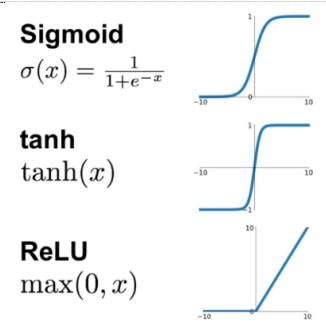

Понятно, что предыдущие сети использовали сигмоиду. Реализуем сети с использованием tanh и ReLu

In [ ]:
def ReLU(x):
    return x * (x > 0)

class Neuron_tanh(Neuron):
  def feedforward(self, inputs):
    total = np.dot(self.weights, inputs) + self.bias
    return np.tanh(total)

class Neuron_ReLU(Neuron):
  def feedforward(self, inputs):
    total = np.dot(self.weights, inputs) + self.bias
    return ReLU(total)

class OurNeuralNetwork_new3in_tanh(OurNeuralNetwork_new3in):
  def __init__(self):
    weights = np.array([0.5, 0.5, 0.5])
    bias = 1
    self.h1 = Neuron_tanh(weights, bias)
    self.h2 = Neuron_tanh(weights, bias)
    self.h3 = Neuron_tanh(weights, bias)
    self.o1 = Neuron_tanh(weights, bias)

class OurNeuralNetwork_new3in_ReLU(OurNeuralNetwork_new3in):
  def __init__(self):
    weights = np.array([0.5, 0.5, 0.5])
    bias = 1
    self.h1 = Neuron_ReLU(weights, bias)
    self.h2 = Neuron_ReLU(weights, bias)
    self.h3 = Neuron_ReLU(weights, bias)
    self.o1 = Neuron_ReLU(weights, bias)


network = OurNeuralNetwork_new3in()
x = np.array([2, 3, 4])
print("sigmoid network:", network.feedforward(x))

network = OurNeuralNetwork_new3in_tanh()
x = np.array([2, 3, 4])
print("tanh network:", network.feedforward(x))

network = OurNeuralNetwork_new3in_ReLU()
x = np.array([2, 3, 4])
print("ReLU network:", network.feedforward(x))

sigmoid network: 0.9237127124780461
tanh network: 0.9866129657015765
ReLU network: 9.25


Задача:

Используйте классы MLPClassified и MLPRegressor для классификации и
регрессии произвольных данных из интернета. Проведите анализ
атрибуты, полученных моделей.

Для классификации можете взять набор данных Ирисов:

https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv

а для регрессии датасет зависимости заработной платы от опыта работы:

https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linearregression/master/Salary_Data.csv

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier, MLPRegressor

In [ ]:
url_iris="https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
dataset_iris=pd.read_csv(url_iris)
dataset_sada = pd.read_csv('Salary_Data.csv')
dataset_iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
dataset_sada.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
X_iris = dataset_iris.drop('variety',axis=1)
y_iris = dataset_iris['variety']
X_sada = dataset_sada.drop('Salary',axis=1)
y_sada = dataset_sada['Salary']

classifier = MLPClassifier()
regressor = MLPRegressor(solver='lbfgs')

X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size = 0.2, random_state = 0)
classifier.fit(X_train, y_train)
y_preds_iris = classifier.predict(X_test)
print("MLP Classifier")
print("train score: ", classifier.score(X_train, y_train))
print("test score: ", classifier.score(X_test, y_test))

X_train, X_test, y_train, y_test = train_test_split(X_sada, y_sada, test_size = 0.2, random_state = 0)
regressor.fit(X_train, y_train)
y_preds_sada = regressor.predict(X_test)
print("MLP Regressor")
print("train score: ", regressor.score(X_train, y_train))
print("test score: ", regressor.score(X_test, y_test))


MLP Classifier
train score:  0.975
test score:  1.0
MLP Regressor
train score:  0.9411951101055348
test score:  0.9881699544831183


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
